
<h1 align="center">ECE 4438B Advanced Image Processing and Analysis</h1>
<h3 align="center">Assignment #2</h3>
<h4 align="center">Jianhui Li,  <a href="mailto:ljianhui@uwo.ca?subject=Assignment2">ljianhui@uwo.ca</a></h4>
<h4 align="center">Mechatronic Systems Engineering</h4>
<h4 align="center">Western University</h4>
<h4 align="center">Date of submission: Mar. 1st, 2019</h4>
<h4 align="center">Submitted to: Elvis C.S. Chen</h4>

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from RGB2Gray import RGB2Gray
from myOtsuThresholding import myOtsuThresholding
from myMaxEntropy import myMaxEntropy
from OPA import OPA

%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP 

env: SITK_SHOW_COMMAND=/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP


In [2]:
sitk.WriteImage(RGB2Gray('inputImg_RGB.jpg'),"outputImg_Gray.jpg")    # create output image
outputImg_Gray = sitk.ReadImage("outputImg_Gray.jpg")    # read output image
sitk.Show(outputImg_Gray)    # display output image

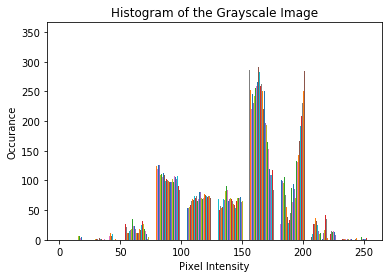

In [3]:
plt.hist(sitk.GetArrayViewFromImage(outputImg_Gray))    # plot histogram
plt.title("Histogram of the Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Occurance")
plt.show()

In [4]:
myOtsuSeg = myOtsuThresholding(outputImg_Gray)    # calculate otsu threshold using my method
sitk.Show(myOtsuSeg)    # image format is in UInt 8, pixel values are 1 and 0

variance =  1583.7181822282146 __ 135


In [5]:
Otsu_Filter = sitk.OtsuThresholdImageFilter()
Otsu_Filter.SetInsideValue(1)
Otsu_Filter.SetOutsideValue(0)
SitkOtsuSeg = Otsu_Filter.Execute(outputImg_Gray)
print( Otsu_Filter.GetThreshold())     # calculate otsu threshold using sitk function

134.0


In [6]:
myMaxEntropySeg = myMaxEntropy(outputImg_Gray)    # calculate max entropy using my method
sitk.Show(myMaxEntropySeg)    # image format is in UInt 8, pixel values are 1 and 0, therefore 

Maximum entropy occurs at intensity: 63


In [7]:
MaxEntropy_Filter = sitk.MaximumEntropyThresholdImageFilter()
MaxEntropy_Filter.SetInsideValue(1)
MaxEntropy_Filter.SetOutsideValue(0)
SitkEntropySeg = MaxEntropy_Filter.Execute(outputImg_Gray)
print(MaxEntropy_Filter.GetThreshold())    # calculate max entropy using sitk function

63.0


In [10]:
overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
overlap_measures_filter.Execute( myMaxEntropySeg,myOtsuSeg )
#Jaccard Similarity Coefficient
print( overlap_measures_filter.GetJaccardCoefficient())
#Dice Similarity Coefficient
print( overlap_measures_filter.GetDiceCoefficient())
#False Positive Rate
print(overlap_measures_filter.GetFalsePositiveError())
#False Negative Rate
print(overlap_measures_filter.GetFalseNegativeError())

0.6449715731041274
0.7841735184359936
0.3550284268958725
0.0


In [9]:
#Jaccard and Dice metric is similar to each other. J=DSC/(2−DSC), and DSC=2J/(1+J)
#they are monotonic to each other.
#Jaccard coefficient is always larger than Dice metric except at the extrema  {0,1} where they are equal. 
#Since we can convert one to the other, it means that both of the metrics measure the same aspects 
#and provide the same system ranking. 
#Therefore, it does not provide additional information to use them together as validation metrices.

In [5]:

X = np.array([[0.0000,0.0000,0.0000],[1.0000, 0.0000, 0.0000], [0.0000,1.0000,0.0000], [2.0000,3.0000,4.0000]]).transpose()
Y = np.array([[5.0000 ,   6.0000,    7.0000],
    [5.6022,    5.2018,    7.0128],
    [5.7818,    6.5930,    7.1927],
    [7.9045,    5.7584,   11.5283]    ]).transpose()
R,T=OPA(X,Y)

[[ 0.60224825  0.78182998 -0.16136584]
 [-0.79820647  0.5929783  -0.10603381]
 [ 0.01278603  0.19266194  0.98118189]]
[4.99997468 6.00001036 7.00001665]


In [ ]:
#n general, how many paired points do we need to obtain a unique solution to register X Y in 3D (5 marks)? Justify your answer.

# at least 4 points. because four related points can detect the unique R and T 



